# 1. What is unsupervised learning in the context of machine learning?

Unsupervised learning refers to techniques where models learn patterns from unlabeled data without predefined outputs or categories.

# 2. What is agglomerative clustering?

Agglomerative clustering is a bottom-up hierarchical clustering method that starts with each data point as a single cluster and iteratively merges the closest clusters until a stopping criterion is met.

# 3. How does K-Means clustering algorithm work?

K-Means works by randomly initializing cluster centroids, assigning each data point to the nearest centroid, recalculating centroids based on current cluster members, and repeating these steps until convergence when cluster assignments stabilize.

# 4. What is inertia in the context of K-Means?

Inertia measures the sum of squared distances between data points and their respective cluster centroids, indicating how tightly data points are grouped within clusters.

# 5. What is the elbow method in K-Means clustering?

The elbow method involves plotting inertia against the number of clusters and selecting the point where the decrease in inertia slows down significantly, indicating an optimal number of clusters.



# 6. What is the main difference between K-Means and Hierarchical Clustering?

K-Means partitions data into a predefined number of flat clusters based on centroids, while Hierarchical Clustering builds a tree-like structure (dendrogram) showing nested groupings without needing to specify the number of clusters upfront.

# 7. Describe the concept of "density" in DBSCAN.

In DBSCAN, "density" refers to the number of data points within a specified radius (epsilon), which determines if a region qualifies as a cluster based on local concentration.

# 8. How does DBSCAN identify noise points?

DBSCAN classifies points as noise if they do not have enough neighboring points within epsilon radius to meet the minimum samples requirement, thus identifying outliers.

# 9. What are the core parameters in DBSCAN, and how do they influence clustering?

The core parameters are epsilon (the neighborhood radius) and min_samples (minimum points to form a dense region). These influence the number of clusters and the sensitivity to noise.

# 10. Why is feature scaling important in clustering algorithms like K-Means?

Feature scaling ensures that all features contribute equally to distance calculations, preventing features with larger ranges from dominating the clustering process.

# 11. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Because K-Means assumes spherical clusters of similar size, it may misclassify points when cluster sizes or densities vary significantly.

# 12. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree diagram illustrating how data points or clusters are merged or split at various levels of similarity, representing the hierarchical structure.

# 13. Can hierarchical clustering be used on categorical data?

Yes, if appropriate similarity or distance measures for categorical data, such as Hamming or Gower’s distance, are used.

# 14. What does a negative Silhouette Score indicate?

A negative Silhouette Score suggests that data points may be assigned to the wrong clusters, with points being more similar to neighboring clusters than their own.

It is used to evaluate how well the data has been clustered, measuring cohesion within clusters and separation between clusters.

# 16. Why is Silhouette Score considered a better metric than just inertia for model evaluation?

Because it accounts for both intra-cluster cohesion and inter-cluster separation, providing a more balanced assessment of clustering quality than inertia alone.

# 17. What are the advantages of DBSCAN over K-Means?

DBSCAN can identify clusters of arbitrary shape, handle noise/outliers effectively, and does not require specifying the number of clusters beforehand.


# 18. What are the limitations of Hierarchical Clustering?

Limitations include high computational complexity for large datasets, sensitivity to noise, and difficulty in determining the optimal number of clusters from the dendrogram.

# 19. How does K-Means++ improve upon standard K-Means initialization?

K-Means++ chooses initial centroids more strategically to spread them out, leading to faster convergence and better clustering results.

# 20. What is the concept of "linkage criteria" in hierarchical clustering?

Linkage criteria define how the distance between clusters is computed during merging, with common methods like single, complete, average, and Ward linkage.

# 21. What makes Silhouette Score a better metric than just inertia for model evaluation?

 It evaluates both cohesion and separation, providing a comprehensive measure of clustering quality.

# ------------------------- Practical ---------------------------------------------------

# 1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

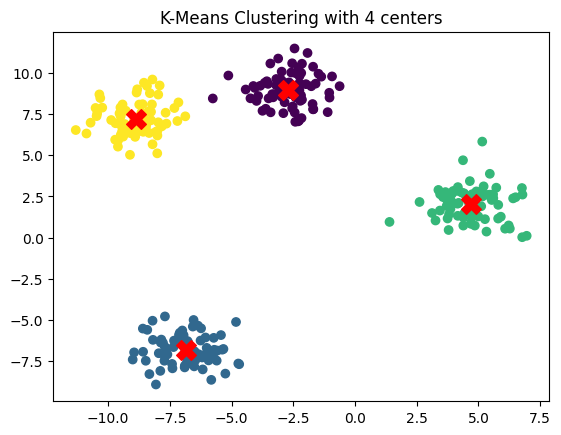

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("K-Means Clustering with 4 centers")
plt.show()

# 2. Load the Iris dataset and use Agglomerative Clustering to group into 3 clusters; display first 10 predicted labels

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted labels:", labels[:10])



First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


# 3. Generate synthetic data with make_moons and apply DBSCAN; highlight outliers

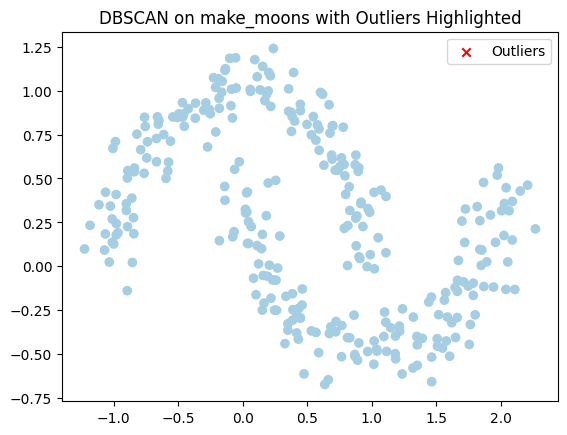

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='Paired')
outliers = X[labels == -1]
plt.scatter(outliers[:,0], outliers[:,1], c='red', marker='x', label='Outliers')
plt.legend()
plt.title("DBSCAN on make_moons with Outliers Highlighted")
plt.show()

# 4. Load the Wine dataset, apply K-Means after standardizing, print cluster sizes

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Count samples in each cluster
for i in range(3):
    print(f"Cluster {i} size:", np.sum(labels == i))

Cluster 0 size: 65
Cluster 1 size: 51
Cluster 2 size: 62


# 5. Use make_circles to generate data and cluster with DBSCAN; plot result

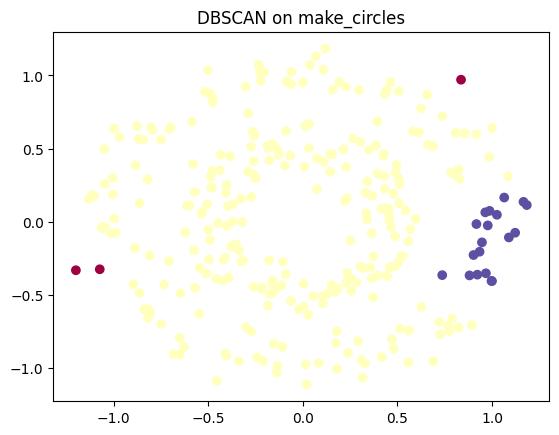

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.1)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='Spectral')
plt.title("DBSCAN on make_circles")
plt.show()

# 6. Load Breast Cancer dataset, apply MinMaxScaler, K-Means with 2 clusters, output centroids

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

bc = load_breast_cancer()
X = bc.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


# 7. Generate synthetic data with make_blobs (varying std), cluster with DBSCAN

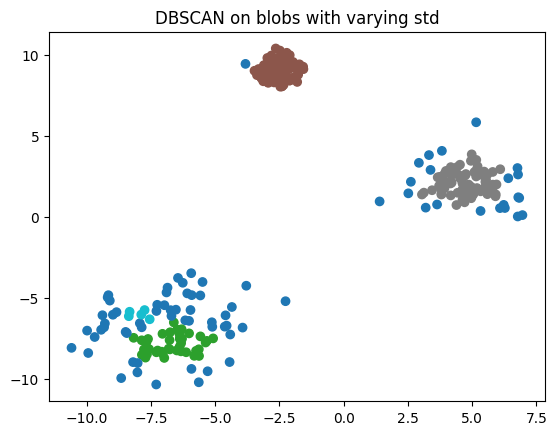

In [7]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.0, 1.5], random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("DBSCAN on blobs with varying std")
plt.show()


# 8. Load Digits dataset, reduce to 2D with PCA, visualize K-Means clusters

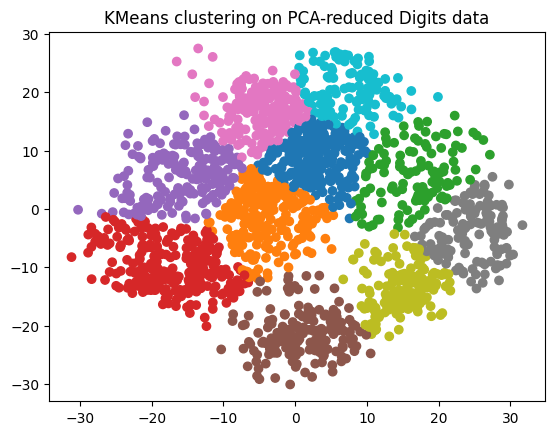

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_reduced)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap='tab10')
plt.title("KMeans clustering on PCA-reduced Digits data")
plt.show()

# 9. Generate data with make_blobs, evaluate silhouette scores for k=2 to 5, display as bar chart

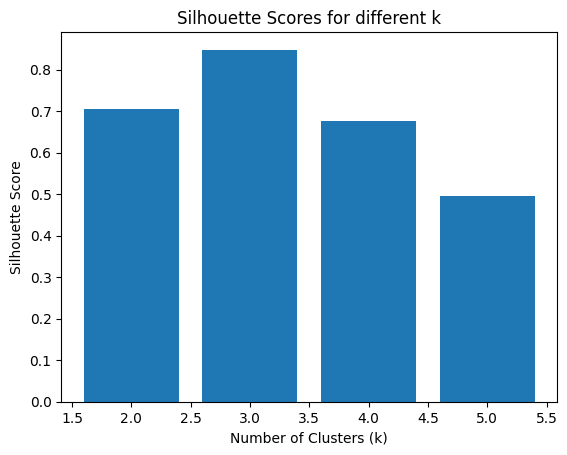

In [9]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
k_range = range(2, 6)

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.bar(k_range, scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()

# 10. Load Iris dataset, hierarchical clustering, plot dendrogram with average linkage

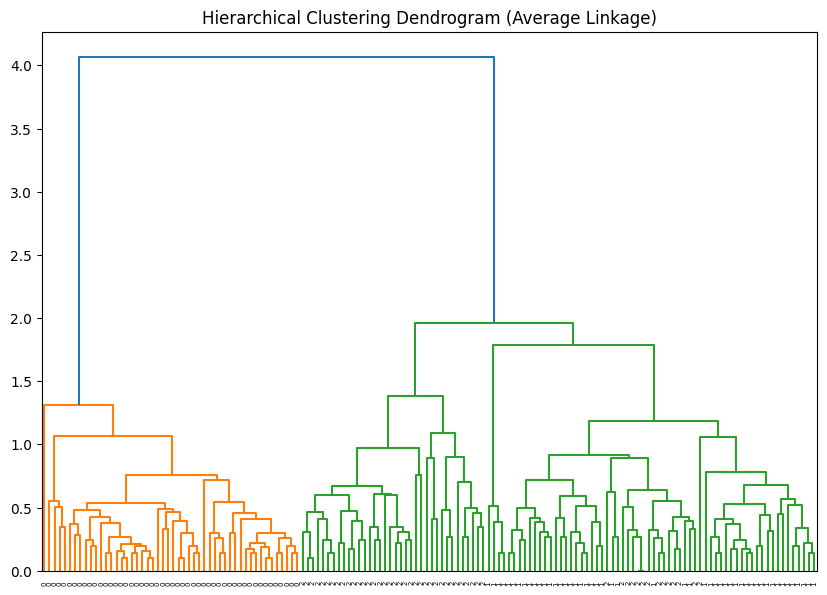

In [10]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

linked = linkage(X, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()

# 11. Generate overlapping clusters with make_blobs, apply K-Means, visualize decision boundaries

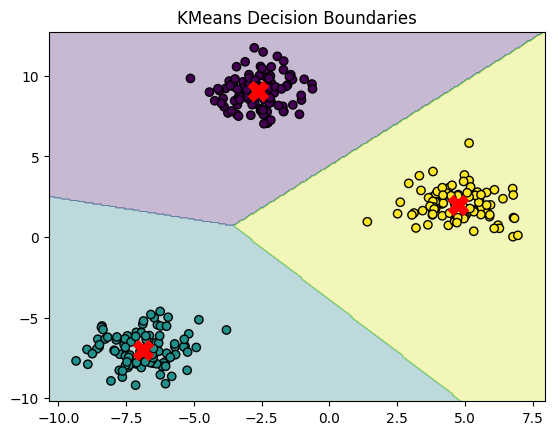

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot decision boundaries
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("KMeans Decision Boundaries")
plt.show()


# 12. Load Digits dataset, apply t-SNE, visualize with DBSCAN

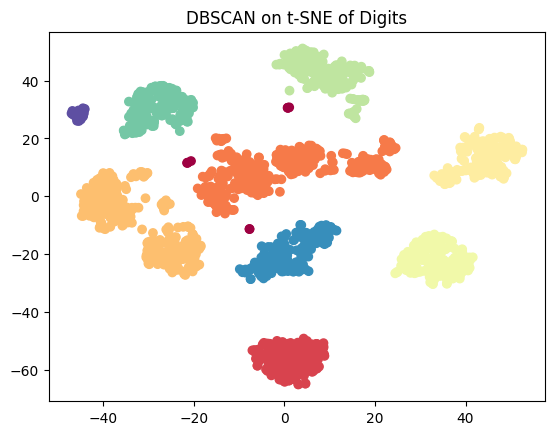

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Spectral')
plt.title("DBSCAN on t-SNE of Digits")
plt.show()

# 13. Generate data with make_blobs, apply Agglomerative Clustering with complete linkage, plot result

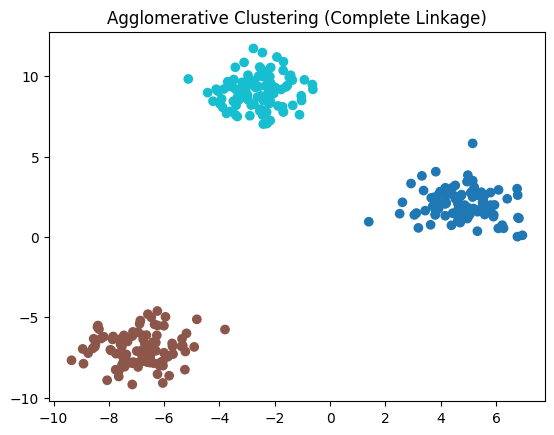

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

# 14. Load Breast Cancer data, compare inertia for K=2 to 6, show in line plot

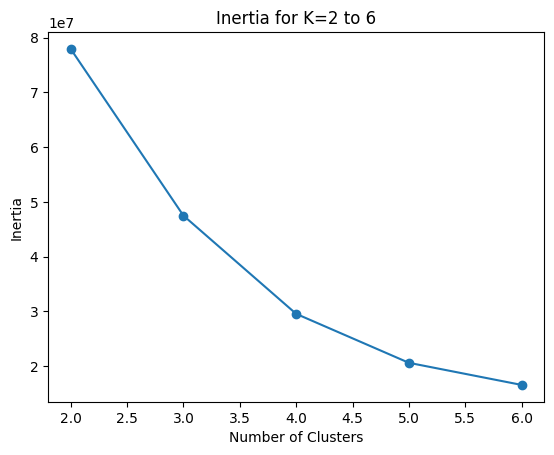

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data

k_values = range(2,7)
inertia_list = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for K=2 to 6')
plt.show()

# 15. Generate concentric circles, cluster with Agglomerative with single linkage

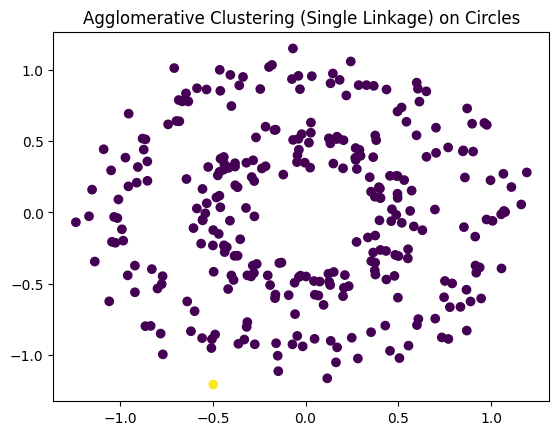

In [15]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.1)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()

# 16. Use Wine dataset, apply DBSCAN after scaling, count number of clusters (excluding noise)

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


# 17. Generate blobs, apply KMeans, plot cluster centers

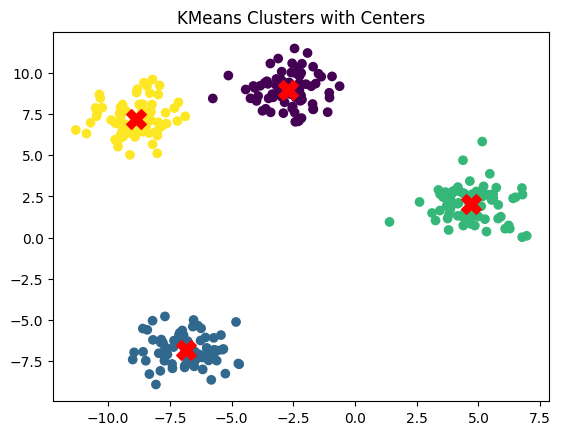

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("KMeans Clusters with Centers")
plt.show()

# 18. Load Iris, cluster with DBSCAN, count noise samples

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

iris = load_iris()
X = iris.data

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

noise_count = np.sum(labels == -1)
print("Number of noise samples:", noise_count)

Number of noise samples: 17


# 19. Generate moons, apply KMeans, visualize result

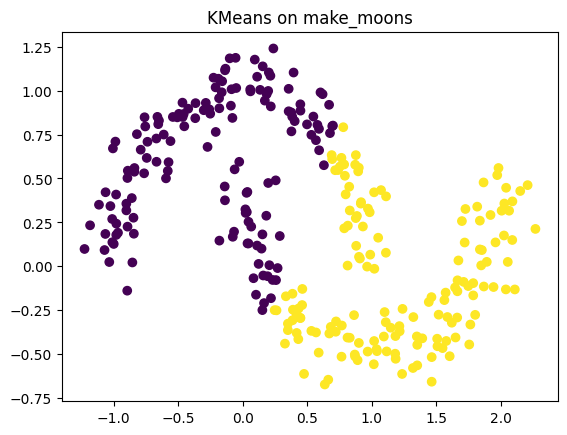

In [19]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("KMeans on make_moons")
plt.show()

# 20. Load Digits, PCA to 3D, KMeans, 3D scatter plot

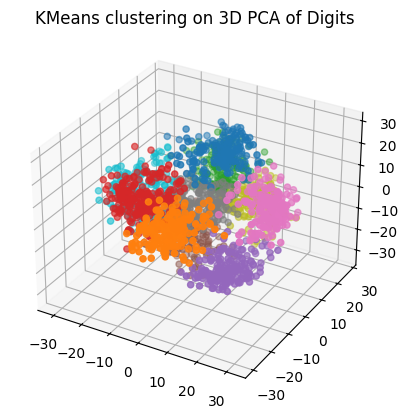

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_reduced)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=labels, cmap='tab10')
ax.set_title("KMeans clustering on 3D PCA of Digits")
plt.show()

# 21. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X, _ = make_blobs(n_samples=300, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette score for 5 centers:", score)

Silhouette score for 5 centers: 0.6529948721222021


# 22. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

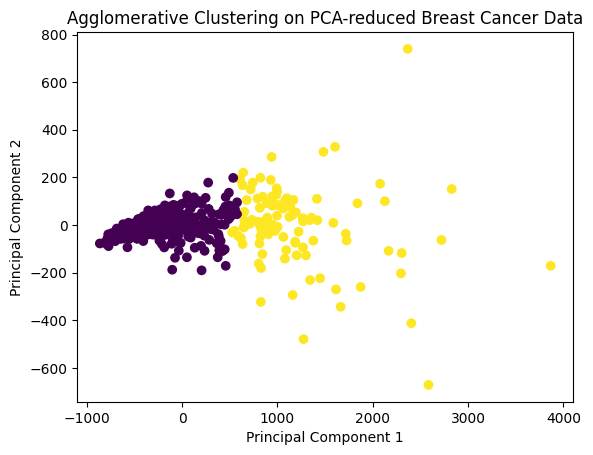

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_reduced)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on PCA-reduced Breast Cancer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 23. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

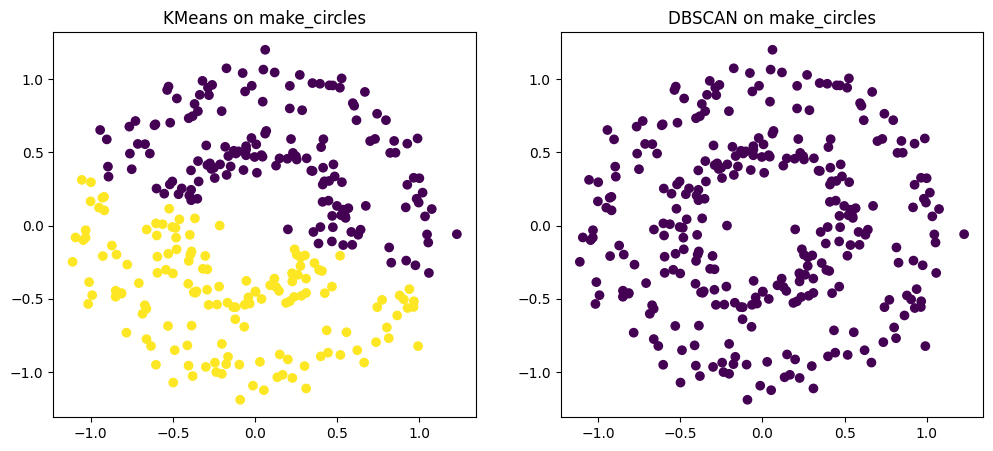

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.1)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:,0], X[:,1], c=kmeans_labels, cmap='viridis')
axes[0].set_title("KMeans on make_circles")

axes[1].scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='viridis')
axes[1].set_title("DBSCAN on make_circles")

plt.show()

# 24. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

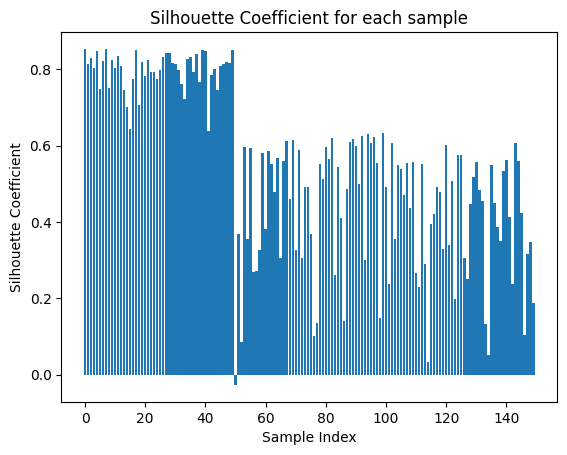

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

sample_silhouette_values = silhouette_samples(X, labels)

plt.bar(range(len(X)), sample_silhouette_values)
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for each sample')
plt.show()

# 25. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

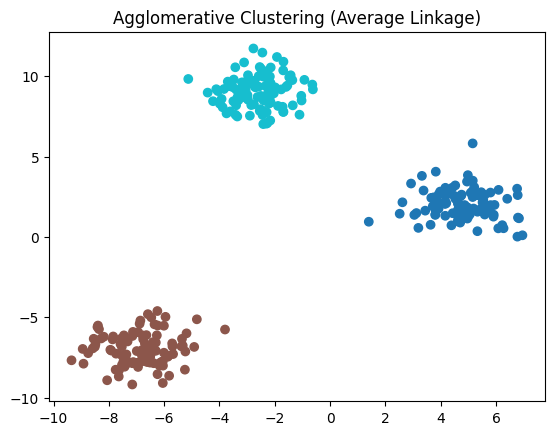

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()

# 26. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

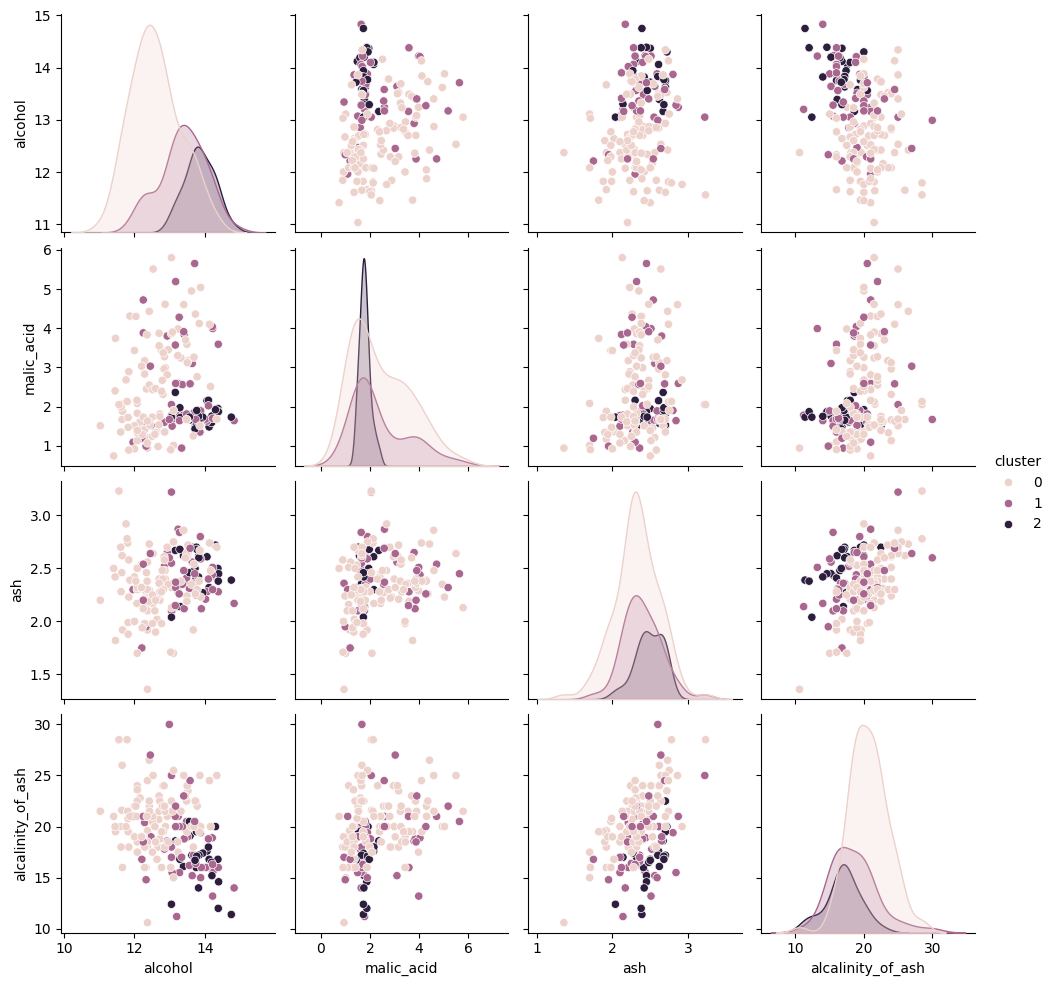

In [26]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
X = wine.data
df = pd.DataFrame(X, columns=wine.feature_names)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
df['cluster'] = labels

sns.pairplot(df, vars=wine.feature_names[:4], hue='cluster')
plt.show()

# 27. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

n_noise = np.sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

Number of clusters: 11
Number of noise points: 172


# 28. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

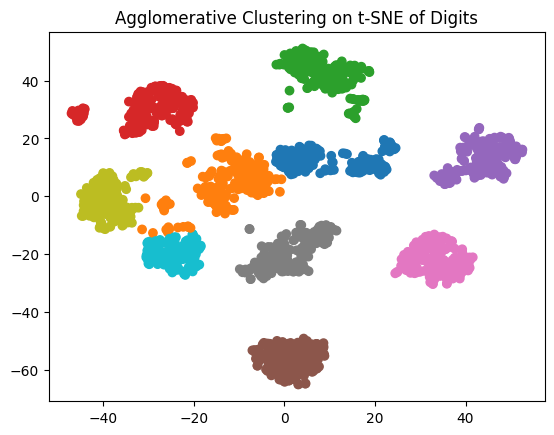

In [28]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on t-SNE of Digits")
plt.show()